In [1]:
import pandas as pd

df = pd.read_csv("college.csv")
df = pd.DataFrame(df)
df_reduced = df[['accept', 'enroll', 'grad_rate', 'apps']]

df_reduced.head()

,accept,enroll,grad_rate,apps
0,1232,721,60,1660
1,1924,512,56,2186
2,1097,336,54,1428
3,349,137,59,417
4,146,55,15,193


In [2]:
from sklearn.model_selection import train_test_split
X = df_reduced.drop('apps', axis=1)
y = df_reduced['apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [3]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus, graphviz
from six import StringIO
from IPython.display import Image

#from sklearn.tree import export_text
#dtree = DecisionTreeClassifier(random_state = 0, max_depth = 4)
#clf = dtree.fit(X_train, y_train)
#r = export_text(dtree)
#print (r)



ModuleNotFoundError: No module named 'graphviz'

In [4]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X, y)

DecisionTreeRegressor(max_depth=4)

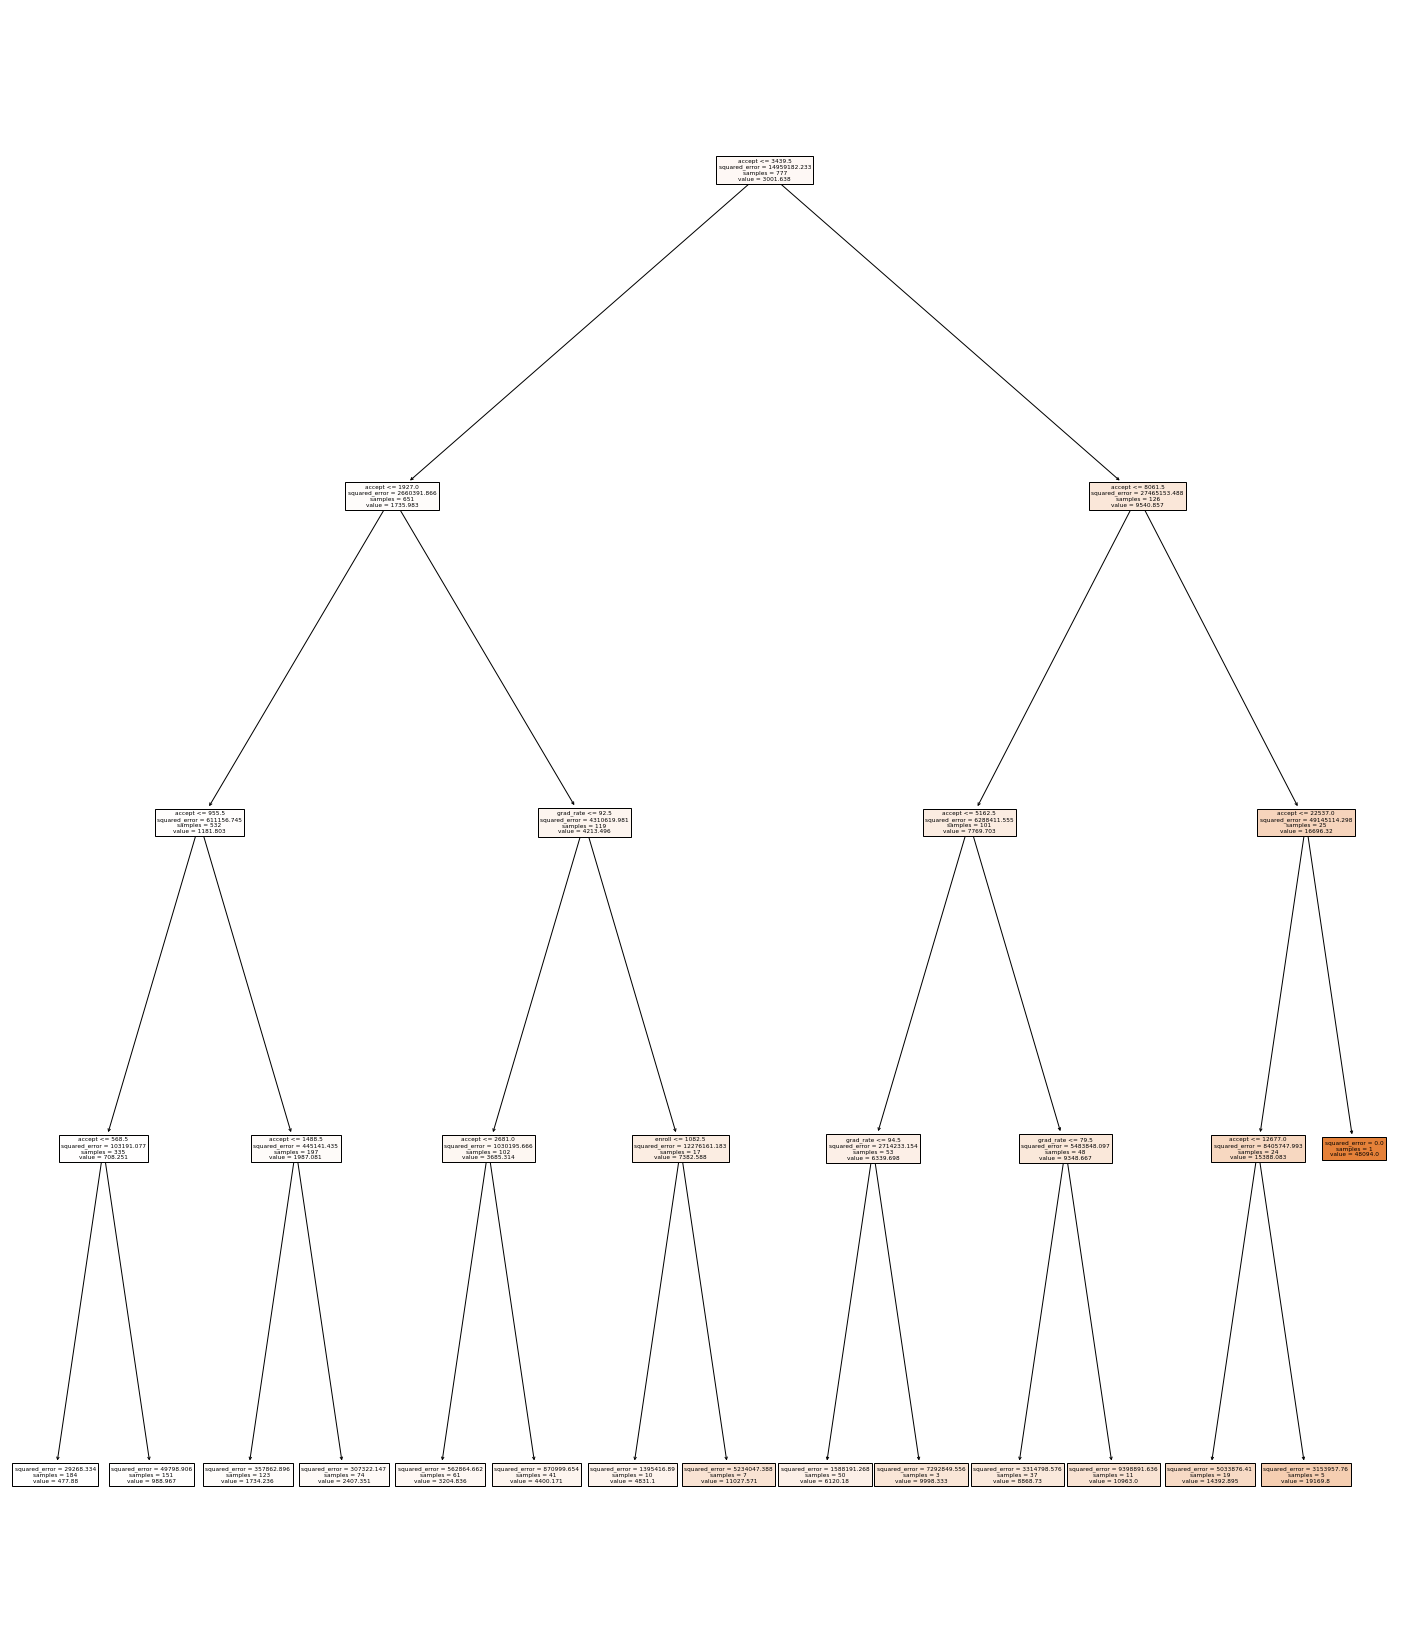

In [5]:
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt, feature_names=X.columns, filled=True)

In [6]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
dtree = DecisionTreeClassifier(random_state = 0, max_depth = 4)
clf = dtree.fit(X_train, y_train)
r = export_text(dtree)
print (r)



|--- feature_1 <= 96.00
|   |--- feature_0 <= 229.00
|   |   |--- feature_0 <= 150.50
|   |   |   |--- feature_1 <= 50.50
|   |   |   |   |--- class: 167
|   |   |   |--- feature_1 >  50.50
|   |   |   |   |--- class: 141
|   |   |--- feature_0 >  150.50
|   |   |   |--- feature_0 <= 175.50
|   |   |   |   |--- class: 213
|   |   |   |--- feature_0 >  175.50
|   |   |   |   |--- class: 222
|   |--- feature_0 >  229.00
|   |   |--- class: 325
|--- feature_1 >  96.00
|   |--- feature_1 <= 106.50
|   |   |--- feature_2 <= 42.50
|   |   |   |--- feature_0 <= 219.50
|   |   |   |   |--- class: 232
|   |   |   |--- feature_0 >  219.50
|   |   |   |   |--- class: 263
|   |   |--- feature_2 >  42.50
|   |   |   |--- feature_2 <= 66.00
|   |   |   |   |--- class: 344
|   |   |   |--- feature_2 >  66.00
|   |   |   |   |--- class: 247
|   |--- feature_1 >  106.50
|   |   |--- feature_0 <= 602.50
|   |   |   |--- feature_0 <= 510.50
|   |   |   |   |--- class: 434
|   |   |   |--- feature_0 >  51

In [7]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt, X, y,
              target_name = 'apps',
              feature_names = X_columns)
viz

ModuleNotFoundError: No module named 'dtreeviz'

In [8]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

import matplotlib as mpl

font= {'family' : 'serif',
      'size'  : 28}

mpl.rc('font', **font)
mpl.style.use('seaborn')


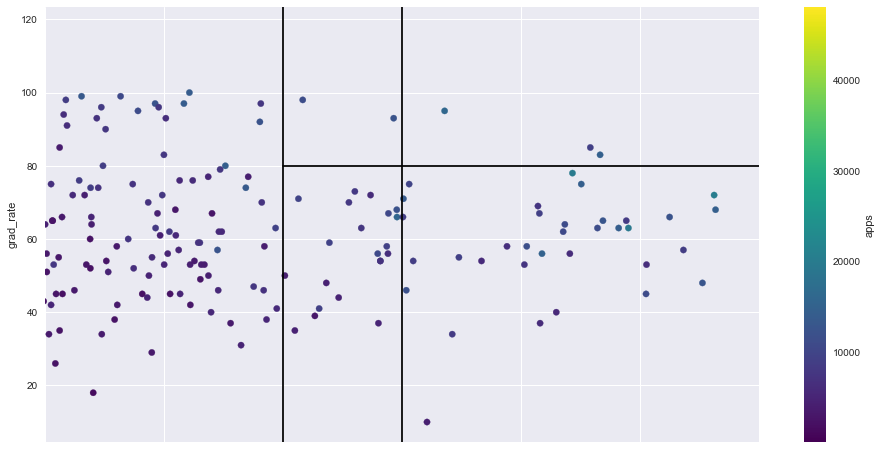

In [9]:
ax2 = df_reduced.plot.scatter(x='enroll', y='grad_rate', c='apps', colormap='viridis', 
                              s=40, figsize=(16,8), xlim=(1000,4000))
ax2.axvline(2000, color= 'black');ax2.axvline(2500, color='black')
x2, y2 = [2000,4000 ], [80, 80]
plt.plot(x2, y2, color='black');
plt.savefig('dtree_scatter.png')

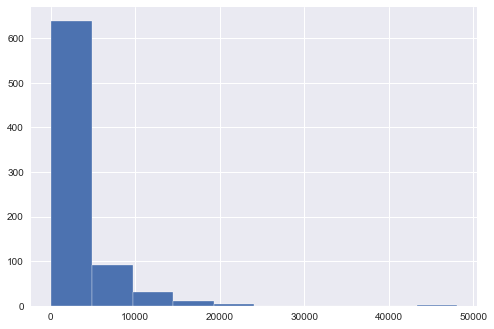

In [10]:
df_reduced['apps'].hist();

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_reduced['apps'].values, (df_reduced['apps']+1000).values)

1000000.0

# Access the Potentialof overfitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dt = DecisionTreeRegressor(max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.7743419699975935

In [16]:
dt = DecisionTreeRegressor(max_depth=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9999999614496884

In [17]:
dt.score(X_test, y_test)

0.8411218784972365

# Randomized Search CV

In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import scipy as sc
from sklearn.metrics import accuracy_score


In [39]:
from sklearn.model_selection import train_test_split
X = df_reduced.drop('apps', axis=1)
y = df_reduced['apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [40]:
pipepline = make_pipeline(StandardScaler(), SVC(random_state =1))

In [41]:
param_dist = [{'svc_C' : sc.stats.expon(scale=100),
              'svc_gamma' : sc.stats.expon(scale=.1),
              'svc_kernel' : ['rbf']},
             { 'svc_C' : sc.stats.expon(scale=100),
               'svc_kernel' : ['linear']}]

In [44]:
rs = RandomizedSearchCV(SVC(gamma='auto'), {
    'C' :[1, 20, 30],
    'kernel': ['rbf']
    },
    cv = 2,
    return_train_score = False,
    n_iter=2
)

In [45]:
rs.fit(X_train, y_train)

/Users/amandeepkaur/opt/anaconda3/envs/jasdata_science/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 20, 30], 'kernel': ['rbf']})

In [46]:
print("tuned hyperparameters : (best parameters)", rs.best_params_)

tuned hyperparameters : (best parameters) {'kernel': 'rbf', 'C': 20}


In [47]:
print("Accuracy : ",rs.best_score_*100)

Accuracy :  0.18450184501845018
